## ASSIGNMENT # 1
## Humna Khan

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv("/home/shafeenkhan/Documents/My-all-programs--/Semester-4/Aritificial Intelligence/Lab-Assignments/Assignment 01/Humna/total_data_na.csv")
# print(df)
df = df.dropna()
# print(df)

# df = df.fillna('-', inplace=True)
print(df)
# df






               PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  \
0         Aaron Finch     10       9   1     134  46  16.75  100  134.00   
1      AB de Villiers     12      11   2     480  90  53.33  275  174.54   
2     Abhishek Sharma      3       3   2      63  46     63   33  190.90   
3      Ajinkya Rahane     15      14   1     370  65  28.46  313  118.21   
4          Alex Hales      6       6   0     148  45  24.66  118  125.42   
..                ...    ...     ...  ..     ...  ..    ...  ...     ...   
138     Siddarth Kaul      0       0   0       0   0      0    0    0.00   
139       Trent Boult      0       0   0       0   0      0    0    0.00   
140       Umesh Yadav      0       0   0       0   0      0    0    0.00   
141        Vi0y Kumar      0       0   0       0   0      0    0    0.00   
142  Yuzvendra Chahal      0       0   0       0   0      0    0    0.00   

     X100  ...    Ov  Runs.y  Wkts  BBI  Avg.y   Econ   SR.y  X4w  X5w  y  
0       0  

In [71]:

features = df[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]
features = features.replace('-', np.nan)

imp = SimpleImputer(strategy="mean")
features = pd.DataFrame(imp.fit_transform(features), columns = features.columns)

stScaler = StandardScaler()
scaledFeatures = stScaler.fit_transform(features)
print(scaledFeatures)

kmean = KMeans(n_clusters = 3, random_state=  42, n_init = 1000)
kmean.fit(scaledFeatures)
centroid = kmean.cluster_centers_
print("Centroids: ", centroid)

label = kmean.labels_
print("Lables:", label)

iClusters = kmean.fit_predict(scaledFeatures)


[[ 0.00943771  0.40323538 -0.03937894 ... -1.08126244 -1.3206071
  -1.1344344 ]
 [ 1.98807763  1.78437691  2.14671767 ... -1.08126244 -1.3206071
  -1.1344344 ]
 [-0.39658378  0.40323538  2.72461691 ... -1.08126244 -1.3206071
  -1.1344344 ]
 ...
 [-0.75685636 -1.04068531 -1.04039365 ... -0.04270068  0.36491249
   0.11820146]
 [-0.75685636 -1.04068531 -1.04039365 ...  0.53372595  2.31419659
  -0.23128002]
 [-0.75685636 -1.04068531 -1.04039365 ...  0.42191906  0.23624687
   0.82894469]]
Centroids:  [[-0.50046143 -0.54017673 -0.45058281 -0.51949627 -0.36357766 -0.1600461
  -0.43622554  0.48857749  0.42680737  0.          0.57099546  0.68530401
   0.59020988]
 [ 0.21285693  0.53417477  0.34680174  0.28723146  0.55603584 -0.1600461
   0.00553937 -0.88183644 -0.75698935  0.         -1.01879256 -1.19525003
  -1.04636282]
 [ 2.24070575  1.79176269  1.69793966  2.18947406  0.80143018  1.18622403
   2.32368507 -0.79978095 -0.72616725  0.         -0.95899101 -1.20758319
  -1.00508236]]
Lables: [1 

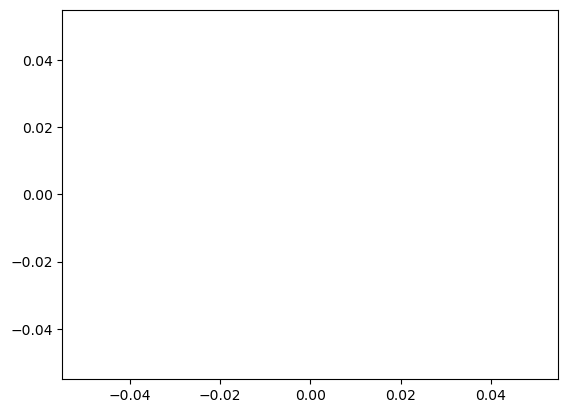

In [72]:
sumofsquarede = []
for k in range(1, 11):
    plt.plot(numClusters=k, randomState = 0, n_init = 100, max_iterations = 1000)
    kmean.fit(scaledFeatures)
    sumofsquarede.append(kmean.inertia_)




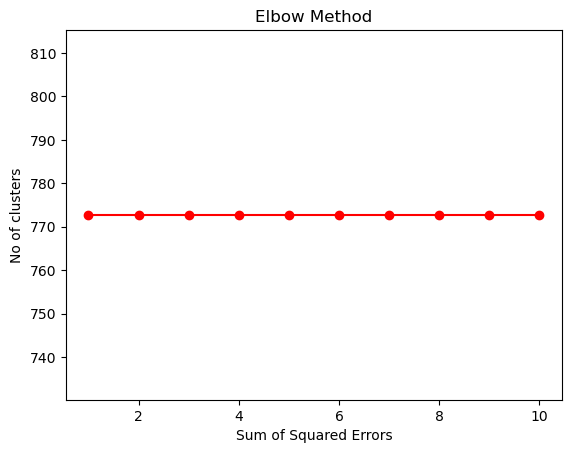

In [73]:
num_clusters = range(1, 11)
plt.plot(num_clusters, sumofsquarede, marker = 'o', color = "red")
# plt.annotate('Elbow', xy = (4,200), xytext(4, 300), arrowprops = {"arrowstyle": "->"})
plt.title("Elbow Method")
plt.xlabel("Sum of Squared Errors")
plt.ylabel("No of clusters")
plt.show()


    

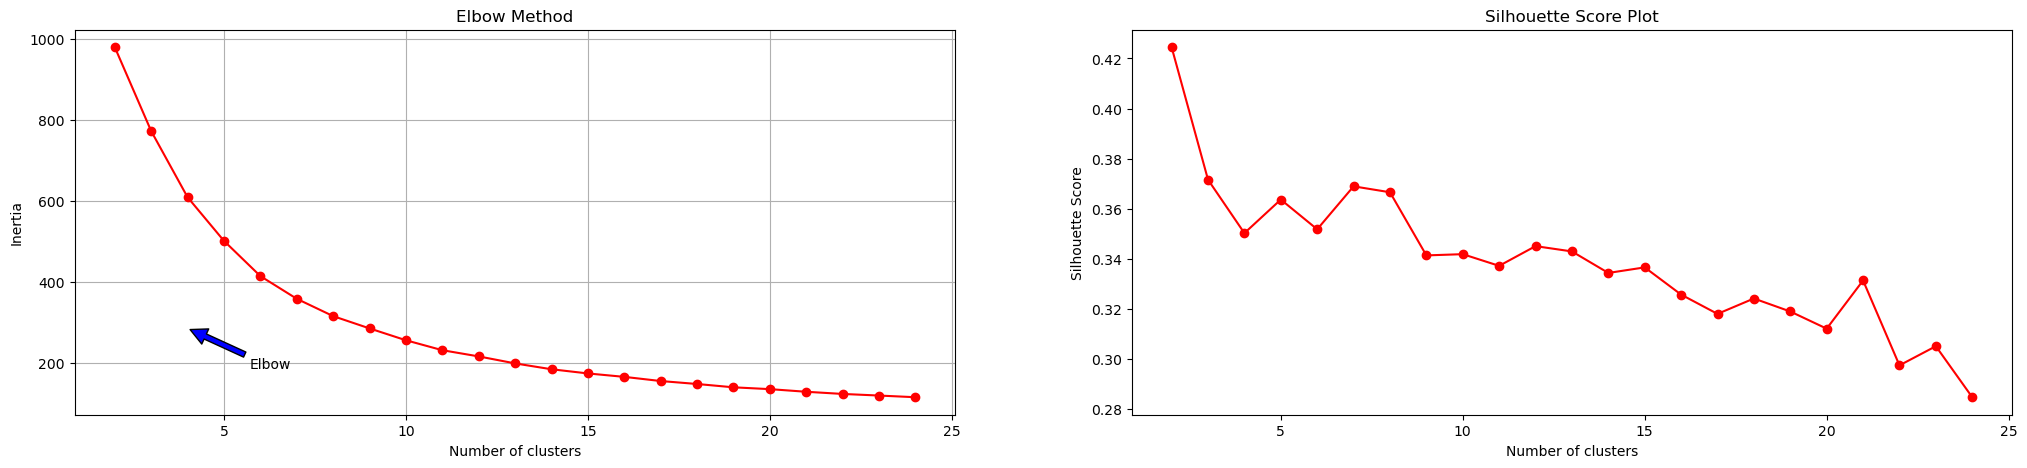

In [74]:
silhouetteScores = []
sumofsquarede = []

for k in range(2, 25):
    kmean = KMeans(n_clusters=k, random_state=0, n_init=100, max_iter=1000)
    kmean.fit(scaledFeatures)
    score = silhouette_score(scaledFeatures, kmean.labels_)
    silhouetteScores.append(score)
    sumofsquared = kmean.inertia_
    sumofsquarede.append(sumofsquared)

fig, (a1, a2) = plt.subplots(1, 2, figsize=(25, 5))

num_clusters = range(2, 25)
a1.plot(num_clusters, sumofsquarede, marker='o', color="red")
a1.grid(True)
a1.annotate("Elbow", xy=(4, sumofsquarede[7]), xytext=(0.1, 0.2), textcoords="figure fraction", arrowprops=dict(facecolor="blue", shrink=0.04))
a1.set_xlabel("Number of clusters")
a1.set_ylabel("Inertia")
a1.set_title("Elbow Method")

a2.plot(range(2, 25), silhouetteScores, marker="o", color="red")
a2.set_xlabel("Number of clusters")
a2.set_ylabel("Silhouette Score")
a2.set_title("Silhouette Score Plot")
plt.show()




In [75]:
kmean = KMeans(n_clusters=  3, random_state=  42, n_init = 100)
kmean.fit(scaledFeatures)

centroid = kmean.cluster_centers_
iClusters = kmean.fit_predict(scaledFeatures)
features["cluster"] = iClusters

In [77]:
topOrder = 2
middleOrder = 4
allRounders = 2
ballers = 4

tOrder = features[features["cluster"]==0]
mOrder = features[features["cluster"]==1]
all_rounders = features[features["cluster"]==2]
baller = features[features["cluster"]==3]

print("Top Order Batsmen:")
print(df.loc[tOrder.index])
print("Middle Order Batsmen:")
print()
print(df.loc[mOrder.index])
print("All Rounders:")
print()
print(df.loc[all_rounders.index])
print("Bowlers:")
print(df.loc[baller.index])
print()

Top Order Batsmen:
               PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  \
6       Andre Russell     16      14   3     316  88  28.72  171  184.79   
7          Andrew Tye     14       8   2      32  14   5.33   38   84.21   
8          Axar Patel      9       8   2      80  19  13.33   69  115.94   
9         Ben Cutting      9       6   2      96  37     24   58  165.51   
10         Ben Stokes     13      13   1     196  45  16.33  161  121.73   
..                ...    ...     ...  ..     ...  ..    ...  ...     ...   
138     Siddarth Kaul      0       0   0       0   0      0    0    0.00   
139       Trent Boult      0       0   0       0   0      0    0    0.00   
140       Umesh Yadav      0       0   0       0   0      0    0    0.00   
141        Vi0y Kumar      0       0   0       0   0      0    0    0.00   
142  Yuzvendra Chahal      0       0   0       0   0      0    0    0.00   

     X100  ...    Ov  Runs.y  Wkts  BBI  Avg.y   Econ   SR.y  X4w  X

In [78]:

tOrder = features[features["cluster"]==0].nlargest(3, ["Runs.x", "SR.x"])
mOrder = features[features["cluster"]==1].nlargest(3, ["Runs.x"])
all_rounders = features[features["cluster"]==2].nlargest(3, ["Wkts", "Runs.x"])
baller = features[features["cluster"]==3].nlargest(3, ["Wkts", "Econ"])

In [79]:

print("Top Order Batsmen:")
print(df.loc[tOrder.index])
print()
print("Middle Order Batsmen:")
print(df.loc[mOrder.index])
print()
print("All Rounders:")
print(df.loc[all_rounders.index])
print()
print("Bowlers:")
print(df.loc[baller.index])

Top Order Batsmen:
           PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
89    Sunil 0rine     16      16   0     357  75  22.31  188  189.89     0   
6   Andre Russell     16      14   3     316  88  28.72  171  184.79     0   
33  Hardik Pandya     13      13   4     260  50  28.88  195  133.33     0   

    ...    Ov  Runs.y  Wkts  BBI  Avg.y  Econ   SR.y  X4w  X5w  y  
89  ...  61.0     467    17    0  27.47  7.65  21.52    0    0  0  
6   ...  37.5     355    13    0   27.3  9.38  17.46    0    0  0  
33  ...  42.4     381    18    0  21.16  8.92  14.22    0    0  0  

[3 rows x 25 columns]

Middle Order Batsmen:
            PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
28      Evin Lewis     13      13   0     382  65  29.38  276  138.40     0   
3   Ajinkya Rahane     15      14   1     370  65  28.46  313  118.21     0   
74   Robin Uthappa     16      16   0     351  54  21.93  265  132.45     0   

    ...   Ov  Runs.y  Wkts  BBI  